### Wavelet decomposition

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio

In [296]:
# Load signal
signal = sio.loadmat('signal.mat', squeeze_me = True, struct_as_record = False)
signal = signal['signal']
fsample = 500

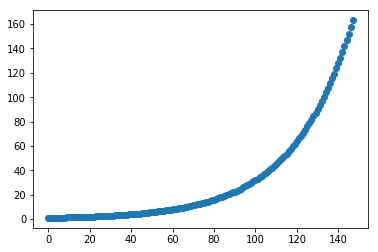

In [292]:
# Define frequencies
freqs = 2**(np.arange(0, 7.4, 0.05))
plt.plot(freqs, 'o')

In [310]:
span = 1
fsample = 500

spectrum = np.zeros(freqs.size)
amplitude = np.zeros((freqs.size, signal.size))
phase = np.zeros((freqs.size, signal.size))

for f in range(freqs.size):
    freq = freqs[f];
    sigma = span/freq;
    t = (np.arange(-4*sigma, 4*sigma, 1/fsample))
    wavelet = np.exp(-(t**2)/(2*sigma**2))*np.exp(1+1j*2*np.pi*freq*t) #wavelet = gaussian * complex sinusoid
    wave_conv = np.convolve(signal,np.conjugate(wavelet), 'same')
    spectrum[f] = np.mean(wave_conv)
    amplitude[f,:] = np.abs(wave_conv)**2 
    phase[f,:] = np.angle(wave_conv) 

/Users/pinheirochagas/anaconda/envs/mne/lib/python3.6/site-packages/ipykernel_launcher.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  


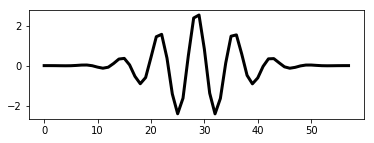

In [298]:
# Example of wavelet for
freq = 70;
span = 1
fsample = 500
sigma = span/freq;
t = (np.arange(-4*sigma, 4*sigma, 1/fsample))
wavelet = np.exp(-(t**2)/(2*sigma**2))*np.exp(1+1j*2*np.pi*freq*t) #wavelet = gaussian * complex sinusoid
fig=plt.figure(figsize=(6, 2))
plt.plot(wavelet.real, 'k',  linewidth=3)

In [299]:
wave_conv = np.convolve(signal,np.conjugate(wavelet), 'same')
amplitude = np.abs(wave_conv)**2 
phase = np.angle(wave_conv)

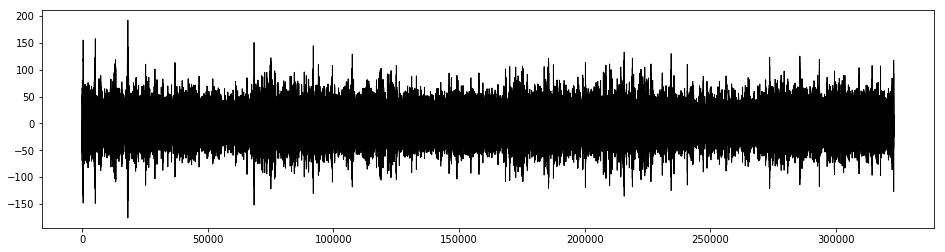

In [300]:
# Plot convolved signal
fig=plt.figure(figsize=(16, 4))
plt.plot(wave_conv.real, 'k', linewidth=1)

Text(0.5, 1.0, 'Amplitude')

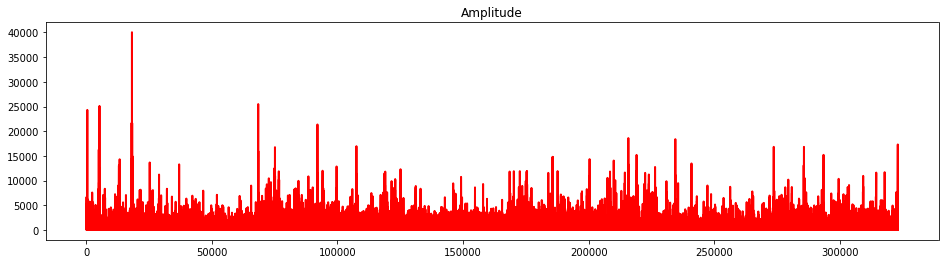

In [301]:
# Plot amplitude
fig=plt.figure(figsize=(16, 4))
plt.plot(amplitude, 'r', linewidth=2)
plt.title('Amplitude')

Text(0.5, 1.0, 'phase')

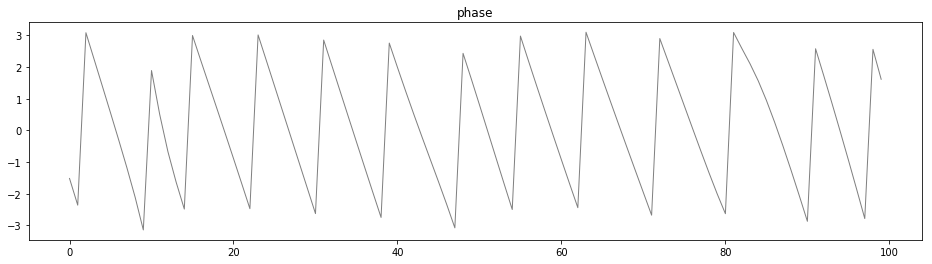

In [303]:
# Plot phase
fig=plt.figure(figsize=(16, 4))
plt.plot(phase[range(100)], 'grey', linewidth=1)
plt.title('phase')

Text(0.5, 1.0, 'frequency spectrum')

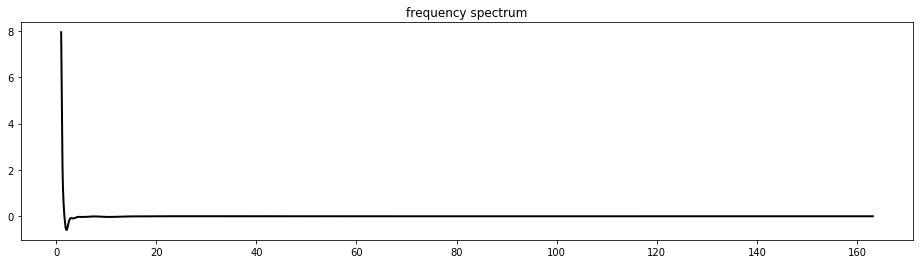

In [311]:
# Plot the spectrum
fig=plt.figure(figsize=(16, 4))
plt.plot(freqs,spectrum, 'k', linewidth=2)
plt.title('frequency spectrum')

Text(0.5, 1.0, 'frequency spectrum')

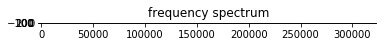

In [317]:
# Plot time frequency spectrum
fig=plt.figure(figsize=(10, 40))
plt.imshow(amplitude)
plt.title('frequency spectrum')

In [ ]:
# Phase spectrum
plt.phase_spectrum(signal, Fs=100, Fc=1,  window=np.hamming(signal.size),
               pad_to=None, sides='default')

(25, 601)

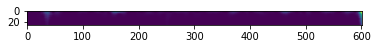

In [265]:
harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(amplitude)

amplitude.shape

In [313]:
amplitude.shape

(148, 323100)

In [253]:
amplitude = np.zeros((freqs.size, signal.size))


In [258]:
amplitude[f,:] = np.abs(wave_conv)**2 

In [264]:
amplitude.shape

(25, 601)